In [1]:
#importing the basic libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

In [76]:
#reading the data
wine=pd.read_csv("E:DataSet/wine.csv")
wine.head()
wine1=wine.copy()

In [5]:
#selecting only numerical data
wine_num=wine.select_dtypes(include="number")
wine_num
wine_ar=wine_num.values
wine_ar

array([[1.000e+00, 1.423e+01, 1.710e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.000e+00, 1.320e+01, 1.780e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.000e+00, 1.316e+01, 2.360e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [3.000e+00, 1.327e+01, 4.280e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [3.000e+00, 1.317e+01, 2.590e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [3.000e+00, 1.413e+01, 4.100e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [6]:
#normalising the data
wine_norm=scale(wine_ar)
wine_norm

array([[-1.21394365,  1.51861254, -0.5622498 , ...,  0.36217728,
         1.84791957,  1.01300893],
       [-1.21394365,  0.24628963, -0.49941338, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [-1.21394365,  0.19687903,  0.02123125, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 1.37386437,  0.33275817,  1.74474449, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 1.37386437,  0.20923168,  0.22769377, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.37386437,  1.39508604,  1.58316512, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [39]:
#using PCA for dimensionality reduction
from sklearn.decomposition import PCA
#choosing the preseved variance as 98%
pca=PCA(n_components=0.98)
pca_values=pca.fit_transform(wine_norm)
pca_values

array([[-3.52293390e+00, -1.45309844e+00, -1.64795488e-01, ...,
         1.06556955e+00, -4.20493905e-01,  5.52927766e-01],
       [-2.52885806e+00,  3.30019252e-01, -2.02670665e+00, ...,
        -2.01820313e-02, -1.30019629e-01,  3.94971160e-01],
       [-2.78502898e+00, -1.03693595e+00,  9.83237703e-01, ...,
        -1.06249125e-01, -2.79074108e-01,  1.89799314e-03],
       ...,
       [ 3.02727243e+00, -2.75604024e+00, -9.40803036e-01, ...,
        -2.12749351e-01,  5.02640272e-01,  6.93336340e-01],
       [ 2.75522166e+00, -2.29378408e+00, -5.50473677e-01, ...,
         4.79793171e-01,  3.13785741e-01,  3.44119826e-01],
       [ 3.49633565e+00, -2.76060799e+00,  1.01315115e+00, ...,
         7.99077497e-02, -2.38282390e-01, -1.89866131e-01]])

In [40]:
pca.components_ #PCA weights

array([[ 0.39366953, -0.13632501,  0.22267638, -0.00225793,  0.22429849,
        -0.12463016, -0.35926404, -0.39071171,  0.2670012 , -0.2790625 ,
         0.08931829, -0.27682265, -0.35052618, -0.26951525],
       [-0.00569041, -0.48416087, -0.22359095, -0.31585588,  0.01161574,
        -0.30055143, -0.06711983,  0.00131345, -0.0269887 , -0.04122256,
        -0.52978274,  0.27790735,  0.16277625, -0.36605886],
       [ 0.00121795, -0.20740081,  0.08879606,  0.62610236,  0.6119896 ,
         0.13098458,  0.14650775,  0.15096275,  0.16997551,  0.14987959,
        -0.1372663 ,  0.08532854,  0.16620436, -0.12668685],
       [ 0.12246373, -0.08191848,  0.46988824, -0.24984122,  0.07199322,
        -0.16321412,  0.19098521,  0.14461667, -0.32801272,  0.46275771,
         0.07211248, -0.43466618,  0.15672341, -0.2557949 ],
       [ 0.15758395, -0.25089415, -0.18860015, -0.0935236 ,  0.0465675 ,
         0.77833048, -0.14466563, -0.11200553, -0.43257916,  0.0915882 ,
        -0.0462696 , -0.02

In [41]:
#explained variance ratio represents the variance explained using a particular eigenvector
var=pca.explained_variance_ratio_
var=(np.round(var,decimals=4)*100)
var

array([39.54, 17.84, 10.33,  6.63,  6.27,  4.81,  3.96,  2.5 ,  2.1 ,
        1.87,  1.61,  1.21])

In [42]:
var1=np.cumsum(var) #cumulative variance
var1

array([39.54, 57.38, 67.71, 74.34, 80.61, 85.42, 89.38, 91.88, 93.98,
       95.85, 97.46, 98.67])

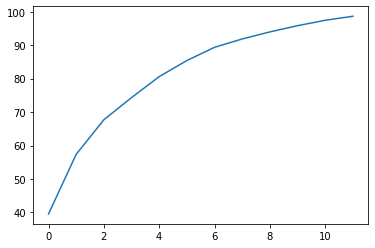

In [43]:
plt.plot(var1) #variance plot for PCA

In [49]:
#creating a dataframe for principal components
finalDF=pd.concat([pd.DataFrame(pca_values[:,0:3],columns=['pc1','pc2','pc3'])],axis=1)
finalDF

,pc1,pc2,pc3
0,-3.522934,-1.453098,-0.164795
1,-2.528858,0.330019,-2.026707
2,-2.785029,-1.036936,0.983238
3,-3.922588,-2.768210,-0.174968
4,-1.407511,-0.867773,2.025829
...,...,...,...
173,3.627996,-2.206617,-0.343668
174,2.942729,-1.752263,0.207480
175,3.027272,-2.756040,-0.940803
176,2.755222,-2.293784,-0.550474


# Clustering

## KMeans Clustering

In [50]:
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [51]:
#normalising the Principal component dataframe
DF=norm_func(finalDF)
DF

,pc1,pc2,pc3
0,0.103200,0.279639,0.445096
1,0.214875,0.520989,0.257637
2,0.186097,0.335968,0.560682
3,0.058303,0.101634,0.444072
4,0.340848,0.358864,0.665651
...,...,...,...
173,0.906538,0.177648,0.427087
174,0.829555,0.239146,0.482577
175,0.839053,0.103282,0.366967
176,0.808490,0.165849,0.406266


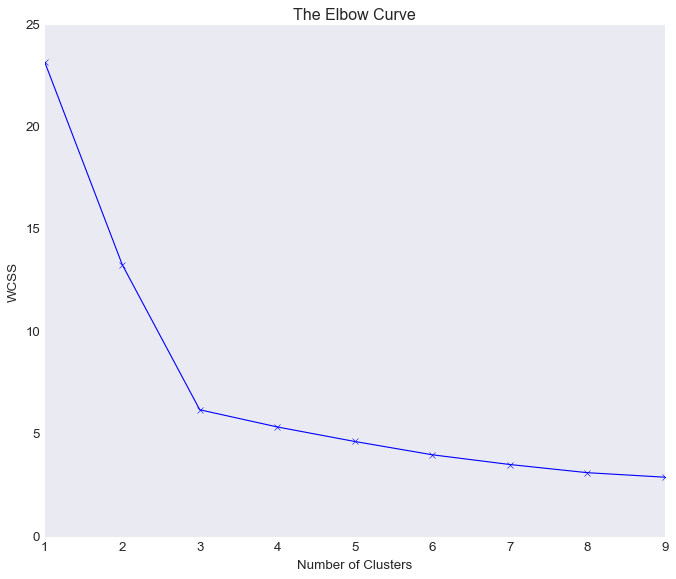

In [56]:
#plotting the elbow curve for optimal number of clusters
from sklearn.cluster import KMeans
plt.style.use('seaborn-dark')
fig=plt.figure(figsize=(10,8))
WCSS=[]
for i in range(1,10):
    clf=KMeans(n_clusters=i)
    clf.fit(DF)
    WCSS.append(clf.inertia_)
plt.plot(range(1,10),WCSS,marker='x')
plt.title("The Elbow Curve")
plt.ylabel("WCSS")
plt.xlabel("Number of Clusters")
plt.show()

In [65]:
kmeans=KMeans(n_clusters=3)
y_kmeans=kmeans.fit_predict(DF)
y_kmeans #cluster labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [67]:
wine['clusters']=y_kmeans
wine #creating a cluster column with the dataset

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clusters
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,0
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,0
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,0
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,0


In [66]:
from sklearn.metrics import silhouette_score
silhouette_score(DF,y_kmeans) #silhoutte score for KMeans clustering

0.5197324964546566

## Hierarchical Clustering

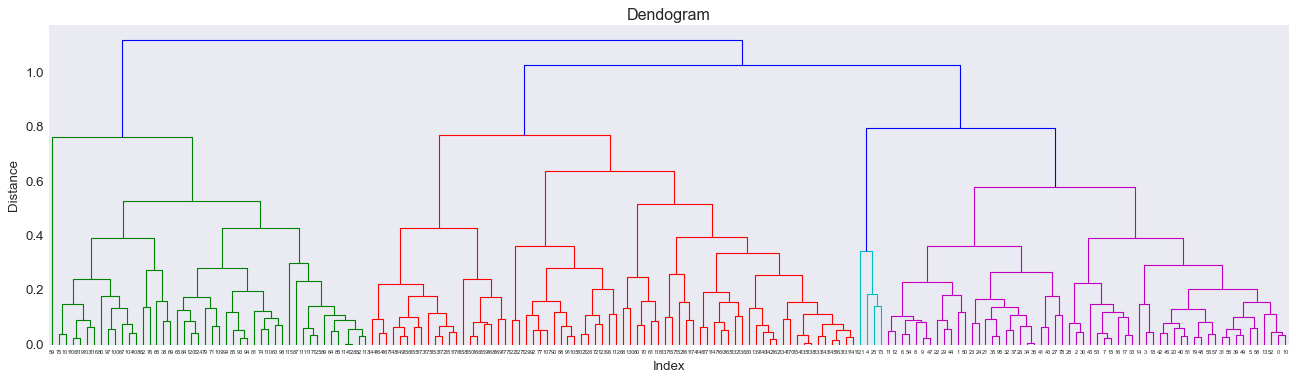

In [75]:
#plotting the dendogram
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch
z=linkage(DF,method="complete",metric="euclidean")
plt.figure(figsize=(20,5))
plt.title("Dendogram")
plt.xlabel("Index")
plt.ylabel("Distance")
sch.dendrogram(
     z,
    leaf_rotation=0,
)
plt.show()

In [82]:
from sklearn.cluster import AgglomerativeClustering
h_cluster=AgglomerativeClustering(n_clusters=3,linkage='complete',affinity='euclidean').fit(DF)
cluster_labels=pd.Series(h_cluster.labels_)
cluster_labels

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Length: 178, dtype: int64

In [83]:
wine1['Clusters']=cluster_labels
wine1

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Clusters
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [84]:
silhouette_score(DF,cluster_labels) #silhoutte score for hierarchical clustering

0.4323562132086492

### Inference

#### Hence we see that the optimum number of clusters for reduced data is 3
#### KMeans clustering gives higher Silhoutte Score than Hierarchical Clustering and we can say that KMeans works better 